In [1]:
include("speciale_tools.jl")
import JLD
import PyPlot

In [2]:

min_vv = -19
max_vv = 4

min_vh = -26
max_vh = -3

min_r = -10
max_r = 1;

min_h = -10
max_h = 100;



In [3]:
import Dates

function _sort_jld_files(file_list,date_position )
    name_list = [split(elem,".")[1] for elem in file_list]
    date_string = [split(elem,"_")[date_position] for elem in name_list]
    date = [Dates.Date(parse.(Int, [elem[1:4], elem[5:6], elem[7:8]])...) for elem in date_string]
    return file_list[sortperm(date)][end:-1:1]
end

function _sort_prossed_files(data_folder,sort_master = true)
    files = readdir(data_folder)


    files = [elem for elem in files if length(elem)>1]
    files = [elem for elem in files if length(split(elem,"_"))>3]

    coherence_idx = [split(elem,"_")[2]=="coh" for elem in files]
    coherence_files = files[coherence_idx ]  
    if sort_master 
        coherence_files = _sort_jld_files(coherence_files,6)
    else
        _sort_jld_files(coherence_files,8)
    end

    coherence_VV_files = [ elem for elem in coherence_files if split(elem,"_")[4]=="VV"]
    coherence_VH_files = [ elem for elem in coherence_files if split(elem,"_")[4]=="VH"]                    

    VV_idx = [(split(elem,"_")[1]=="sigma") & (split(elem,"_")[3]=="VV") for elem in files];
    VV_files = files[VV_idx] 
    VV_files = _sort_jld_files(VV_files,4)

    VH_idx = [(split(elem,"_")[1]=="sigma") & (split(elem,"_")[3]=="VH") for elem in files];
    VH_files= files[VH_idx];                 
    VH_files = _sort_jld_files(VH_files,4)
                                                
    return VV_files,VH_files,coherence_VV_files,coherence_VH_files 
end
                                                
function _load_jld(file_list,data_folder)
    path_names = [joinpath(data_folder,elem) for elem in file_list]
    return [JLD.load(elem,"data") for elem in path_names]
end

_load_jld (generic function with 1 method)

# Vejle

In [4]:
data_folder = "/Users/simon/Documents/DTU fag/Speciale/vejle_new"
data_folder = "/home/data/simon/processed/test_areas/vejle_new"

"/home/data/simon/processed/test_areas/vejle_new"

In [5]:
VV_files,VH_files,coherence_VV_files,coherence_VH_files = _sort_prossed_files(data_folder);

In [6]:
VV_files

8-element Array{String,1}:
 "sigma_S1A_VV_20200217.jld"
 "sigma_S1B_VV_20200211.jld"
 "sigma_S1A_VV_20200205.jld"
 "sigma_S1B_VV_20200130.jld"
 "sigma_S1A_VV_20200124.jld"
 "sigma_S1B_VV_20200118.jld"
 "sigma_S1A_VV_20200112.jld"
 "sigma_S1B_VV_20200106.jld"

In [116]:
VV = _load_jld(VV_files,data_folder);
VH = _load_jld(VH_files,data_folder);

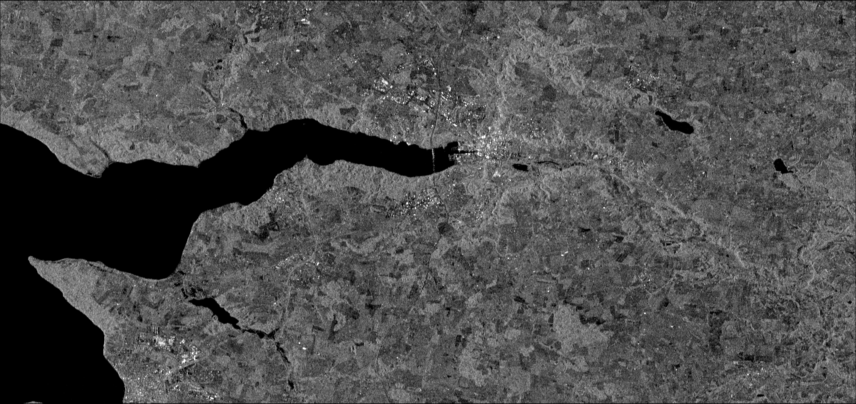

In [147]:
img1 = Colors.Gray.(db_scale_img(VH[2],min_vh,max_vh))

In [148]:
test_area1 = [400:500,200:300]

2-element Array{UnitRange{Int64},1}:
 400:500
 200:300

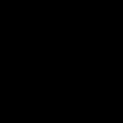

In [149]:
test_area1 = [410:450,210:250]
img1[test_area1...]

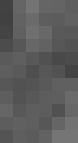

In [150]:
test_area2 = [310:320,1365:1370]
img1[test_area2...]

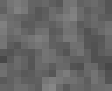

In [151]:
test_area3 = [738:750,1025:1040]
img1[test_area3...]

In [122]:
Statistics.mean( VV[1][test_area3...])

0.10890325137774097

In [123]:
enl(data) = Statistics.mean(data)^2/Statistics.std(data)^2

enl (generic function with 1 method)

### Raw

In [124]:
Statistics.mean([enl(band[test_area1...]) for band in VV]),
Statistics.mean([enl(band[test_area2...]) for band in VV]),
Statistics.mean([enl(band[test_area3...]) for band in VV])

(17.48970052523188, 18.55607619459379, 17.06194182753799)

In [125]:
[enl(band[test_area1...]) for band in VV]

8-element Array{Float64,1}:
 11.836277648091109
 15.812527845024468
 19.369664165647013
 15.34142693391154 
 16.287095294798853
 18.95291838921072 
 18.682082609407985
 23.635611315763352

In [126]:
[enl(band[test_area2...]) for band in VV]

8-element Array{Float64,1}:
 14.599633987831742
 13.35902158938145 
 16.92508577236223 
 18.973325464609538
 15.965511973003444
 23.91785141503582 
 18.495685072297864
 26.212494282228224

In [127]:
[enl(band[test_area3...]) for band in VV]

8-element Array{Float64,1}:
 14.252965361065627
 14.259142840622815
 13.281571434931074
 17.03382553271358 
 16.816033578071327
 14.991656823030445
 17.300757675918263
 28.5595813739508  

In [128]:
Statistics.mean([enl(band[test_area1...]) for band in VH]),
Statistics.mean([enl(band[test_area2...]) for band in VH]),
Statistics.mean([enl(band[test_area3...]) for band in VH])

(25.432696940188656, 22.05301588798898, 21.110930959372464)

In [129]:
[enl(band[test_area1...]) for band in VH]

8-element Array{Float64,1}:
 17.032530312614668
 20.9694169912265  
 26.025710375864058
 23.41194689887049 
 29.923332215655737
 27.027114567899154
 25.56199594828837 
 33.509528211090284

In [130]:
[enl(band[test_area2...]) for band in VH]

8-element Array{Float64,1}:
  8.457951437167917
 17.021195496285735
 18.04238673200395 
 38.21066817553817 
 21.177781789359088
 24.862478055222514
 34.38584437313718 
 14.26582104519731 

In [131]:
[enl(band[test_area3...]) for band in VH]

8-element Array{Float64,1}:
 21.253701980379297
 15.589250144808393
 19.771243726098344
 22.618128587577385
 26.582895740056003
 14.092080954752488
 29.375884172660747
 19.60426236864705 

## Filter

In [132]:
VV_co = VV[1]
VV_pre = VV[2:end]
VV_pre = SlcUtil.temporal_filter(VV_pre,5);

VH_co = VH[1]
VH_pre = VH[2:end]
VH_pre = SlcUtil.temporal_filter(VH_pre,5);

VV_co_filt , VH_co_filt = SlcUtil.temporal_filter([VV_co ,VH_co ],5);

In [133]:
Statistics.mean([enl(band[test_area1...]) for band in VV_pre]),
Statistics.mean([enl(band[test_area2...]) for band in VV_pre]),
Statistics.mean([enl(band[test_area3...]) for band in VV_pre])

(45.78453315097621, 38.94839853985858, 44.424016184792016)

In [134]:
[enl(band[test_area1...]) for band in VV_pre]

7-element Array{Float64,1}:
 53.75645898624405 
 44.203136743149855
 38.11562822653508 
 28.367938285704902
 50.46028970210764 
 43.37353305539114 
 62.21474705770081 

In [135]:
[enl(band[test_area2...]) for band in VV_pre]

7-element Array{Float64,1}:
 34.10815374516828 
 23.971038912458756
 34.149092569567635
 37.088636599934055
 37.00485453019119 
 37.78583563644955 
 68.5311777852406  

In [136]:
[enl(band[test_area3...]) for band in VV_pre]

7-element Array{Float64,1}:
 51.091389187931526
 23.1175279706648  
 34.28333535701365 
 52.95373936179548 
 35.58904710707161 
 58.03495301659329 
 55.89812129247371 

In [137]:
Statistics.mean([enl(band[test_area1...]) for band in VH_pre]),
Statistics.mean([enl(band[test_area2...]) for band in VH_pre]),
Statistics.mean([enl(band[test_area3...]) for band in VH_pre])

(81.11062692703858, 49.37640326710889, 65.38578512023922)

In [138]:
[enl(band[test_area1...]) for band in VH_pre]

7-element Array{Float64,1}:
 95.13133618237285 
 80.27807842428372 
 65.93044961176733 
 87.57570318689366 
 89.33577663369597 
 63.283770381703455
 86.2392740685531  

In [139]:
[enl(band[test_area2...]) for band in VH_pre]

7-element Array{Float64,1}:
 40.80513501157367 
 28.51695773142079 
 71.59920048280841 
 34.595051520270445
 48.266288859857134
 90.5417534730705  
 31.310435790761268

In [140]:
[enl(band[test_area3...]) for band in VH_pre]

7-element Array{Float64,1}:
 63.72301652404612
 55.05340513259867
 76.43541587521656
 97.03082942211572
 39.68543731547626
 61.99368308935942
 63.77870848286185

### Final 

In [141]:
enl(VV_co_filt[test_area1...]),
enl(VV_co_filt[test_area2...]),
enl(VV_co_filt[test_area3...])

(18.22015282031633, 19.717879427793285, 21.697611782019898)

In [142]:
enl(VH_co_filt[test_area1...]),
enl(VH_co_filt[test_area2...]),
enl(VH_co_filt[test_area3...])

(23.382025574896737, 12.876196786725961, 31.43641307659764)

In [143]:
VV_pre_median = dropdims(Statistics.median(cat(VV_pre...,dims=3),dims=3),dims=3);

In [144]:
enl(VV_pre_median[test_area1...]),
enl(VV_pre_median[test_area2...]),
enl(VV_pre_median[test_area3...])

(50.51969593612087, 49.218256069589486, 64.51740444748997)

In [145]:
VH_pre_median = dropdims(Statistics.median(cat(VH_pre...,dims=3),dims=3),dims=3);

In [146]:
enl(VH_pre_median[test_area1...]),
enl(VH_pre_median[test_area2...]),
enl(VH_pre_median[test_area3...])

(115.5310453037536, 64.29393065301117, 118.0526513609445)